In [2]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

11490434/11490434 [==============================] - 0s 0us/step



Epoch 1: val_loss improved from inf to 0.05632, saving model to ./model/01-0.0563.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.05632 to 0.04273, saving model to ./model/02-0.0427.hdf5

Epoch 3: val_loss improved from 0.04273 to 0.03285, saving model to ./model/03-0.0329.hdf5

Epoch 4: val_loss improved from 0.03285 to 0.03198, saving model to ./model/04-0.0320.hdf5

Epoch 5: val_loss did not improve from 0.03198

Epoch 6: val_loss improved from 0.03198 to 0.03163, saving model to ./model/06-0.0316.hdf5

Epoch 7: val_loss improved from 0.03163 to 0.02752, saving model to ./model/07-0.0275.hdf5

Epoch 8: val_loss did not improve from 0.02752

Epoch 9: val_loss did not improve from 0.02752

Epoch 10: val_loss did not improve from 0.02752

Epoch 11: val_loss did not improve from 0.02752

Epoch 12: val_loss did not improve from 0.02752

Epoch 13: val_loss did not improve from 0.02752

Epoch 14: val_loss improved from 0.02752 to 0.02546, saving model to ./model/14-0.0255.hdf5

Epoch 15: val_loss did not improve from 0.02546

Epoch 16: val_loss did not improve from 0.02546

Epoch 17

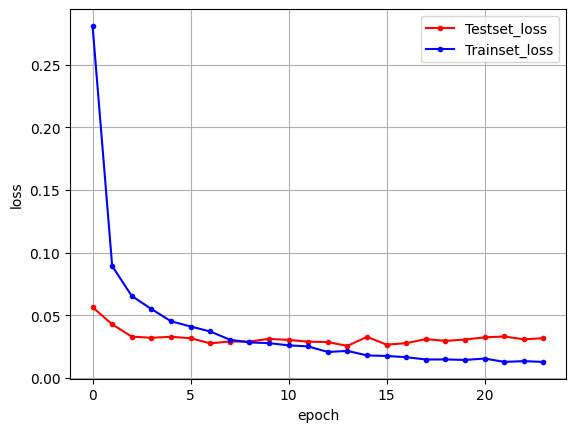

In [3]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()